In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [60]:
from sklearn.datasets import load_breast_cancer

In [61]:
data = load_breast_cancer()

In [62]:
X = data["data"]
y = data["target"]

In [63]:
X.shape

(569, 30)

In [64]:
y.shape

(569,)

In [65]:
type(X)

numpy.ndarray

In [66]:
np.isnan(X).sum()

0

# splitting

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(np.mean(X_train))
print(np.var(X_train))

61.848709880996346
52914.232899621435


# scaling

In [68]:
from sklearn.preprocessing import StandardScaler
stdScalar = StandardScaler()
X_train = stdScalar.fit_transform(X_train)
X_test = stdScalar.transform(X_test)
print(np.mean(X_train))
print(np.var(X_train))

2.9150471210670777e-17
1.0


# Dimension reduction 

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_
        

array([0.43430767, 0.19740115])

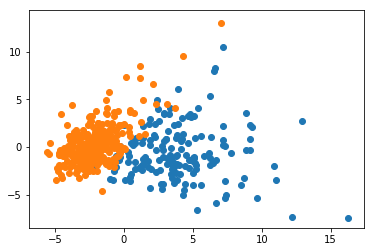

In [70]:
idx_0 = (y_train==0)
idx_1 = (y_train==1)
plt.scatter(X_train[idx_0,0],X_train[idx_0,1])
plt.scatter(X_train[idx_1,0],X_train[idx_1,1])



In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred=classifier.predict(X_test[0:1,:])

In [73]:
y_pred

array([0])

In [74]:
y_test[0]

0

In [75]:
y_pred=classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
print("confusion matrix is = ",confusion_matrix(y_test,y_pred))
print("accuracy is=", np.diag(cm).sum()/np.sum(cm))

confusion matrix is =  [[44  3]
 [ 6 61]]
accuracy is= 0.9210526315789473


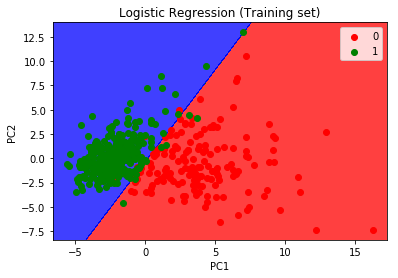

In [79]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

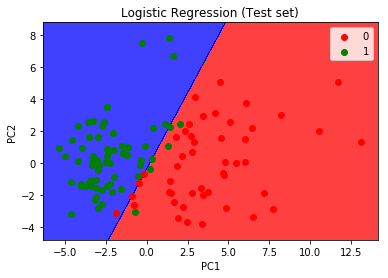

In [80]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()